In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
np.random.seed(42)
data = np.random.normal(loc=50,scale=10,size=100)
outliers = np.array([10,110,5,120])
data = np.concatenate([data,outliers])
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [3]:
print(df.tail())

         Values
99    47.654129
100   10.000000
101  110.000000
102    5.000000
103  120.000000


**scatter plot**

**<ins>A Scatter Plot helps visually identify extreme values.</ins>**

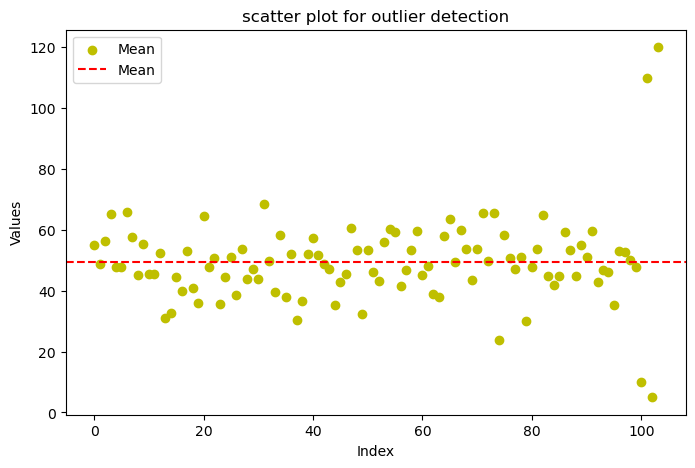

In [8]:

plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='y',label='Mean')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel('Values')
plt.title("scatter plot for outlier detection")
plt.legend()
plt.show()

**BOX PLOT**

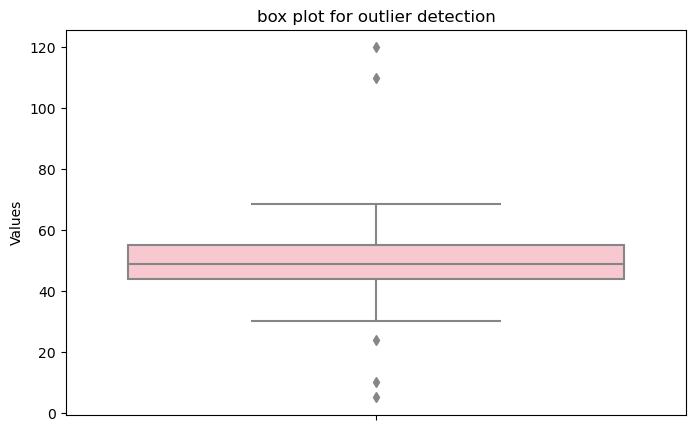

In [10]:

plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values',color='pink')
plt.title("box plot for outlier detection")
plt.show()

**z-score**

  
  z-score formula is:
  z = (X – μ) / σ
  
 x =data point
 
 μ = Mean of the dataset
 
 σ = Standard deviation of teh dataset
 
 if z-score >3 or z-score<-3 mark it as outlier

In [11]:

df['Z-score']=zscore(df['Values'])
df['Outlier_z']=df['Z-score'].apply(lambda x:'Outlier' if abs(x)>3 else 'Normal')
print(df[df['Outlier_z']=='Outlier'])


     Values   Z-score Outlier_z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


**IQR**

***IQR=Q3-Q1(Inter quartile range)***

steps:

    1.caluclate Q1(25th percentile) and Q3(75th percentile)
    
    2.caluclate IQR=Q3-Q1
    
    3.Define lower & upper bounds:
    
        **Lower Bound=Q1-1.5*IQR  **
        **Upper Bound=Q3+1.5*IQR  **
        
    4.Any value outside these bounds is an  outlier

In [15]:
q1 = df['Values'].quantile(0.25)
q3 = df['Values'].quantile(0.75)
iqr  = q3-q1
lower_bound = q1 -1.5*iqr
upper_bound = q3+ 1.5*iqr
df['outlier_iqr']=df['Values'].apply(lambda x: 'Outlier' if(x<lower_bound or x>upper_bound) else 'Normal')
print(df[df['outlier_iqr']=='Outlier'])


         Values   Z-score Outlier_z outlier_iqr
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


**summary**

Scatter plot-> outilers appear far from the main cluster

Box plot -> outliers are outside the whiskers

z-score -> Values with Z>3 and Z<-3 are outliers

IQR -> Values outside [q1-1.5*IQR,q3+1.5*IQR] are outliers

 **Finding Outliers Using the IQR Method with a 5-Number Summary**


The 5-number summary consists of:

 

Minimum (Q0) → The smallest value in the dataset.

 

First Quartile (Q1) → The 25th percentile (lower quartile).

 

Median (Q2) → The 50th percentile (middle value).

 

Third Quartile (Q3) → The 75th percentile (upper quartile).

 

Maximum (Q4) → The largest value in the dataset.

 **compute the 5-number summary, and find the outliers using the IQR**

In [24]:
import numpy as np
np.random.seed(42)
data = np.random.normal(loc=50,scale=10,size=100)
outliers = np.array([10,110,5,120])
data = np.concatenate([data,outliers])
q1 = np.percentile(data,25)
q2 = np.median(data)
q3=np.percentile(data,75)
min_value = np.min(data)
max_value = np.max(data)
iqr = q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
outliers = data[(data<lower_bound)|(data>upper_bound)]
print(f"5-number summary:\n\nMin:{min_value},\tq1:{q1},\tMedian:{q2},\tq3:{q3},\tMax:{max_value}\n")
print(f"IQR:{iqr}\n")
print(f"Lower Bound : {lower_bound},\tUpper_Bound:{upper_bound}\n")
print(f"Outliers:{outliers}")



5-number summary:

Min:5.0,	q1:43.874401021766715,	Median:48.73043708220287,	q3:55.00852473036764,	Max:120.0

IQR:11.134123708600924

Lower Bound : 27.17321545886533,	Upper_Bound:71.70971029326903

Outliers:[ 23.80254896  10.         110.           5.         120.        ]
